# **HEART DISEASE PREDICTION**

## **IMPORTING REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from statistics import mode

## **READING THE DATA**

In [ ]:
path = input("ENTER THE PATH WHERE THE DATASET IS PRESENT(INCLUDE FILE NAME)::")
data = pd.read_csv(path)
data.head(10) 

ENTER THE PATH WHERE THE DATASET IS PRESENT(INCLUDE FILE NAME)::/content/drive/MyDrive/MLBA_PROJECT/heart_cleveland_upload.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [ ]:
data.shape

(297, 14)

## **FEATURES INFORMATION**
1. **Age**       : Describes the Age of the individual
2. **Sex**       : Describes the Gender of the individual
                   1 - Male
                   0 - Female
3. **Cp**        : Type of chest pain 
                   0 - Typical Angina
                   1 - Atypical Angina
                   2 - Non-Anginal Pain
                   3 - Asymptomatic
4. **Trestbps**  : Blood Pressure level in Rest Mode
5. **Chol**      : Cholestrol Levels
6. **Fbs**       : Fasting Blood Sugar Levels
                   1 - True (>120 mg/dl)
                   0 - False
7. **Restecg**   : ECG results during rest period
                   0 - Normal
                   1 - Abnormality in ST-T wave
                   2 - Certainity of LV hypertrophy
8. **Thalach**   : Maximum Heart Rate
9. **Exang**     : Angina(pain in chest areas) Induced by exercises
                   1 - Yes
                   0 - No
10. **Oldpeak**  : ST depression Induced vs Rest
11. **Slope**    : ST depression slope is measured above
                   0 - upsloping
                   1 - Flat
                   2 - Downsloping
12. **Ca**       : its Fluoroscopy 
                  indicates quality of blood flow in coronary arteries (ranges from 0-3)
13. **Thal**     : Heart Status
                   Normal - 0
                   Fixed Defect - 1
                   Reversible Defect - 2
14. **Target**   : Class Label
                   0 - Absence of Heart Disease
                   1 - Presence of Heart Disease 



## **SAMPLES COUNT CLASS WISE IN THE WHOLE DATA**

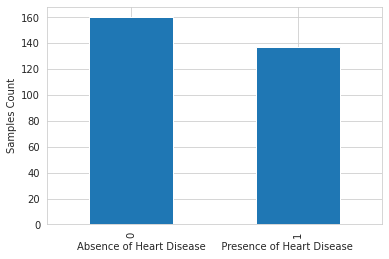

0    160
1    137
Name: condition, dtype: int64

In [ ]:
data['condition'].value_counts().plot(kind='bar')
plt.xlabel("Absence of Heart Disease     Presence of Heart Disease")
plt.ylabel("Samples Count")
plt.show()
data['condition'].value_counts()

## **HISTOGRAM OF ENTIRE DATA**

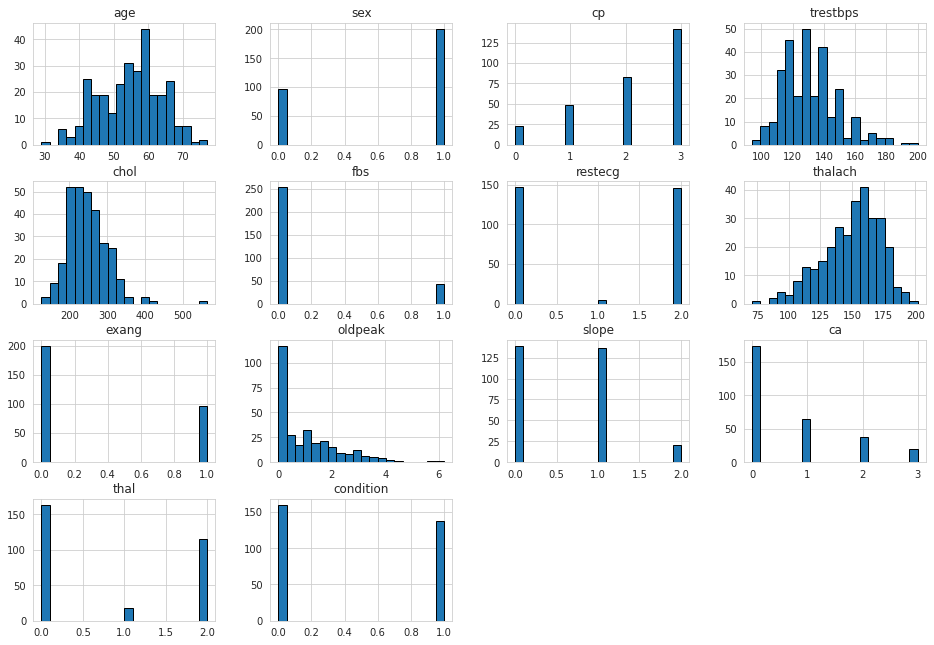

In [ ]:
data.hist(figsize=(16,11), edgecolor="black", bins=20)
plt.show()

## **FUNCTION BLOCK FOR UNIVARIATE ANALYSIS**

In [ ]:
def Univar_analysis(data,feature):
  data_nd = data.loc[data["condition"]==0] 
  data_d = data.loc[data["condition"]==1] 
  sb.set_style("whitegrid") 
  plt.xlabel(feature)
  plt.plot(data_nd[feature],np.zeros_like(data_nd[feature]),marker="x",label='No Heart Disease',color='green') 
  ## zeros_like will simply create zeros with length same as x cordinate.. 
  plt.plot(data_d[feature],np.zeros_like(data_d[feature]),marker="+",label='Having Heart Disease',color='red') 
  plt.legend()
  plt.title("1-D Scatter plot on feature "+feature.upper())
  plt.show()

## **UNIVARIATE ANALYSIS FOR EVERY FEATURE**

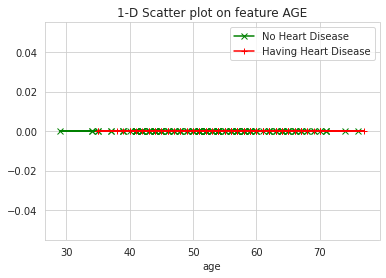

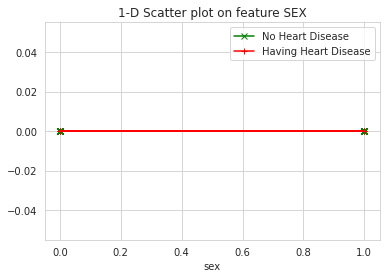

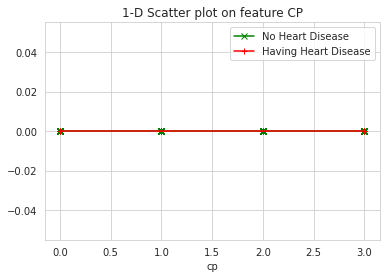

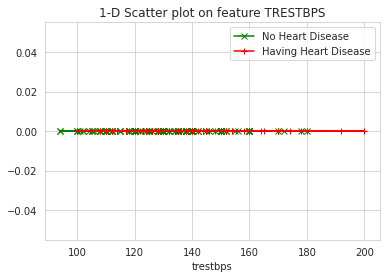

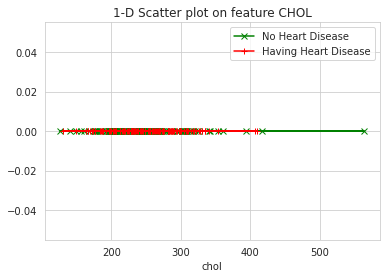

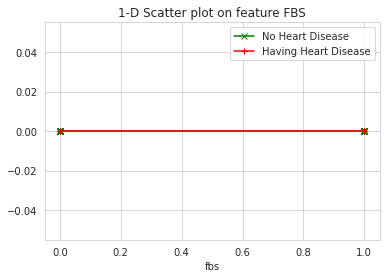

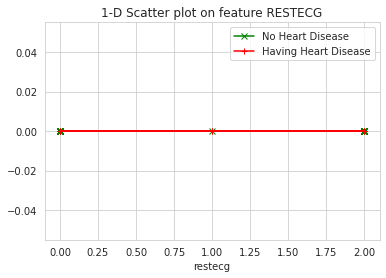

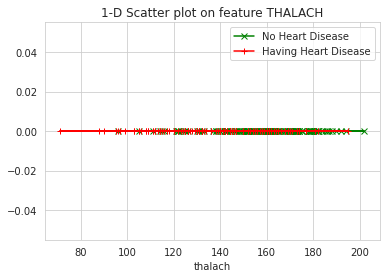

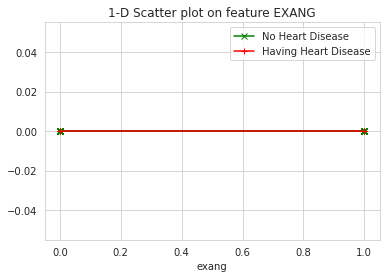

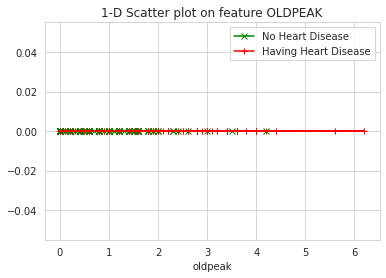

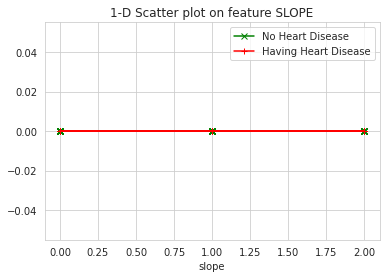

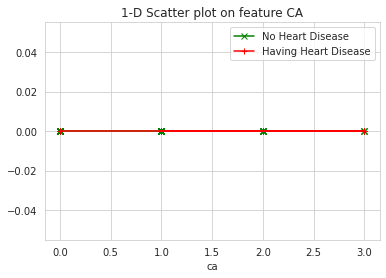

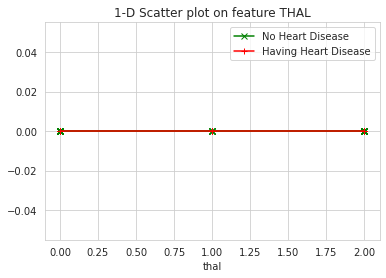

In [ ]:
for i in list(data.columns)[:-1]:
  Univar_analysis(data,i)

## **PAIR PLOTS FOR EVERY PAIR OF FEATURES**

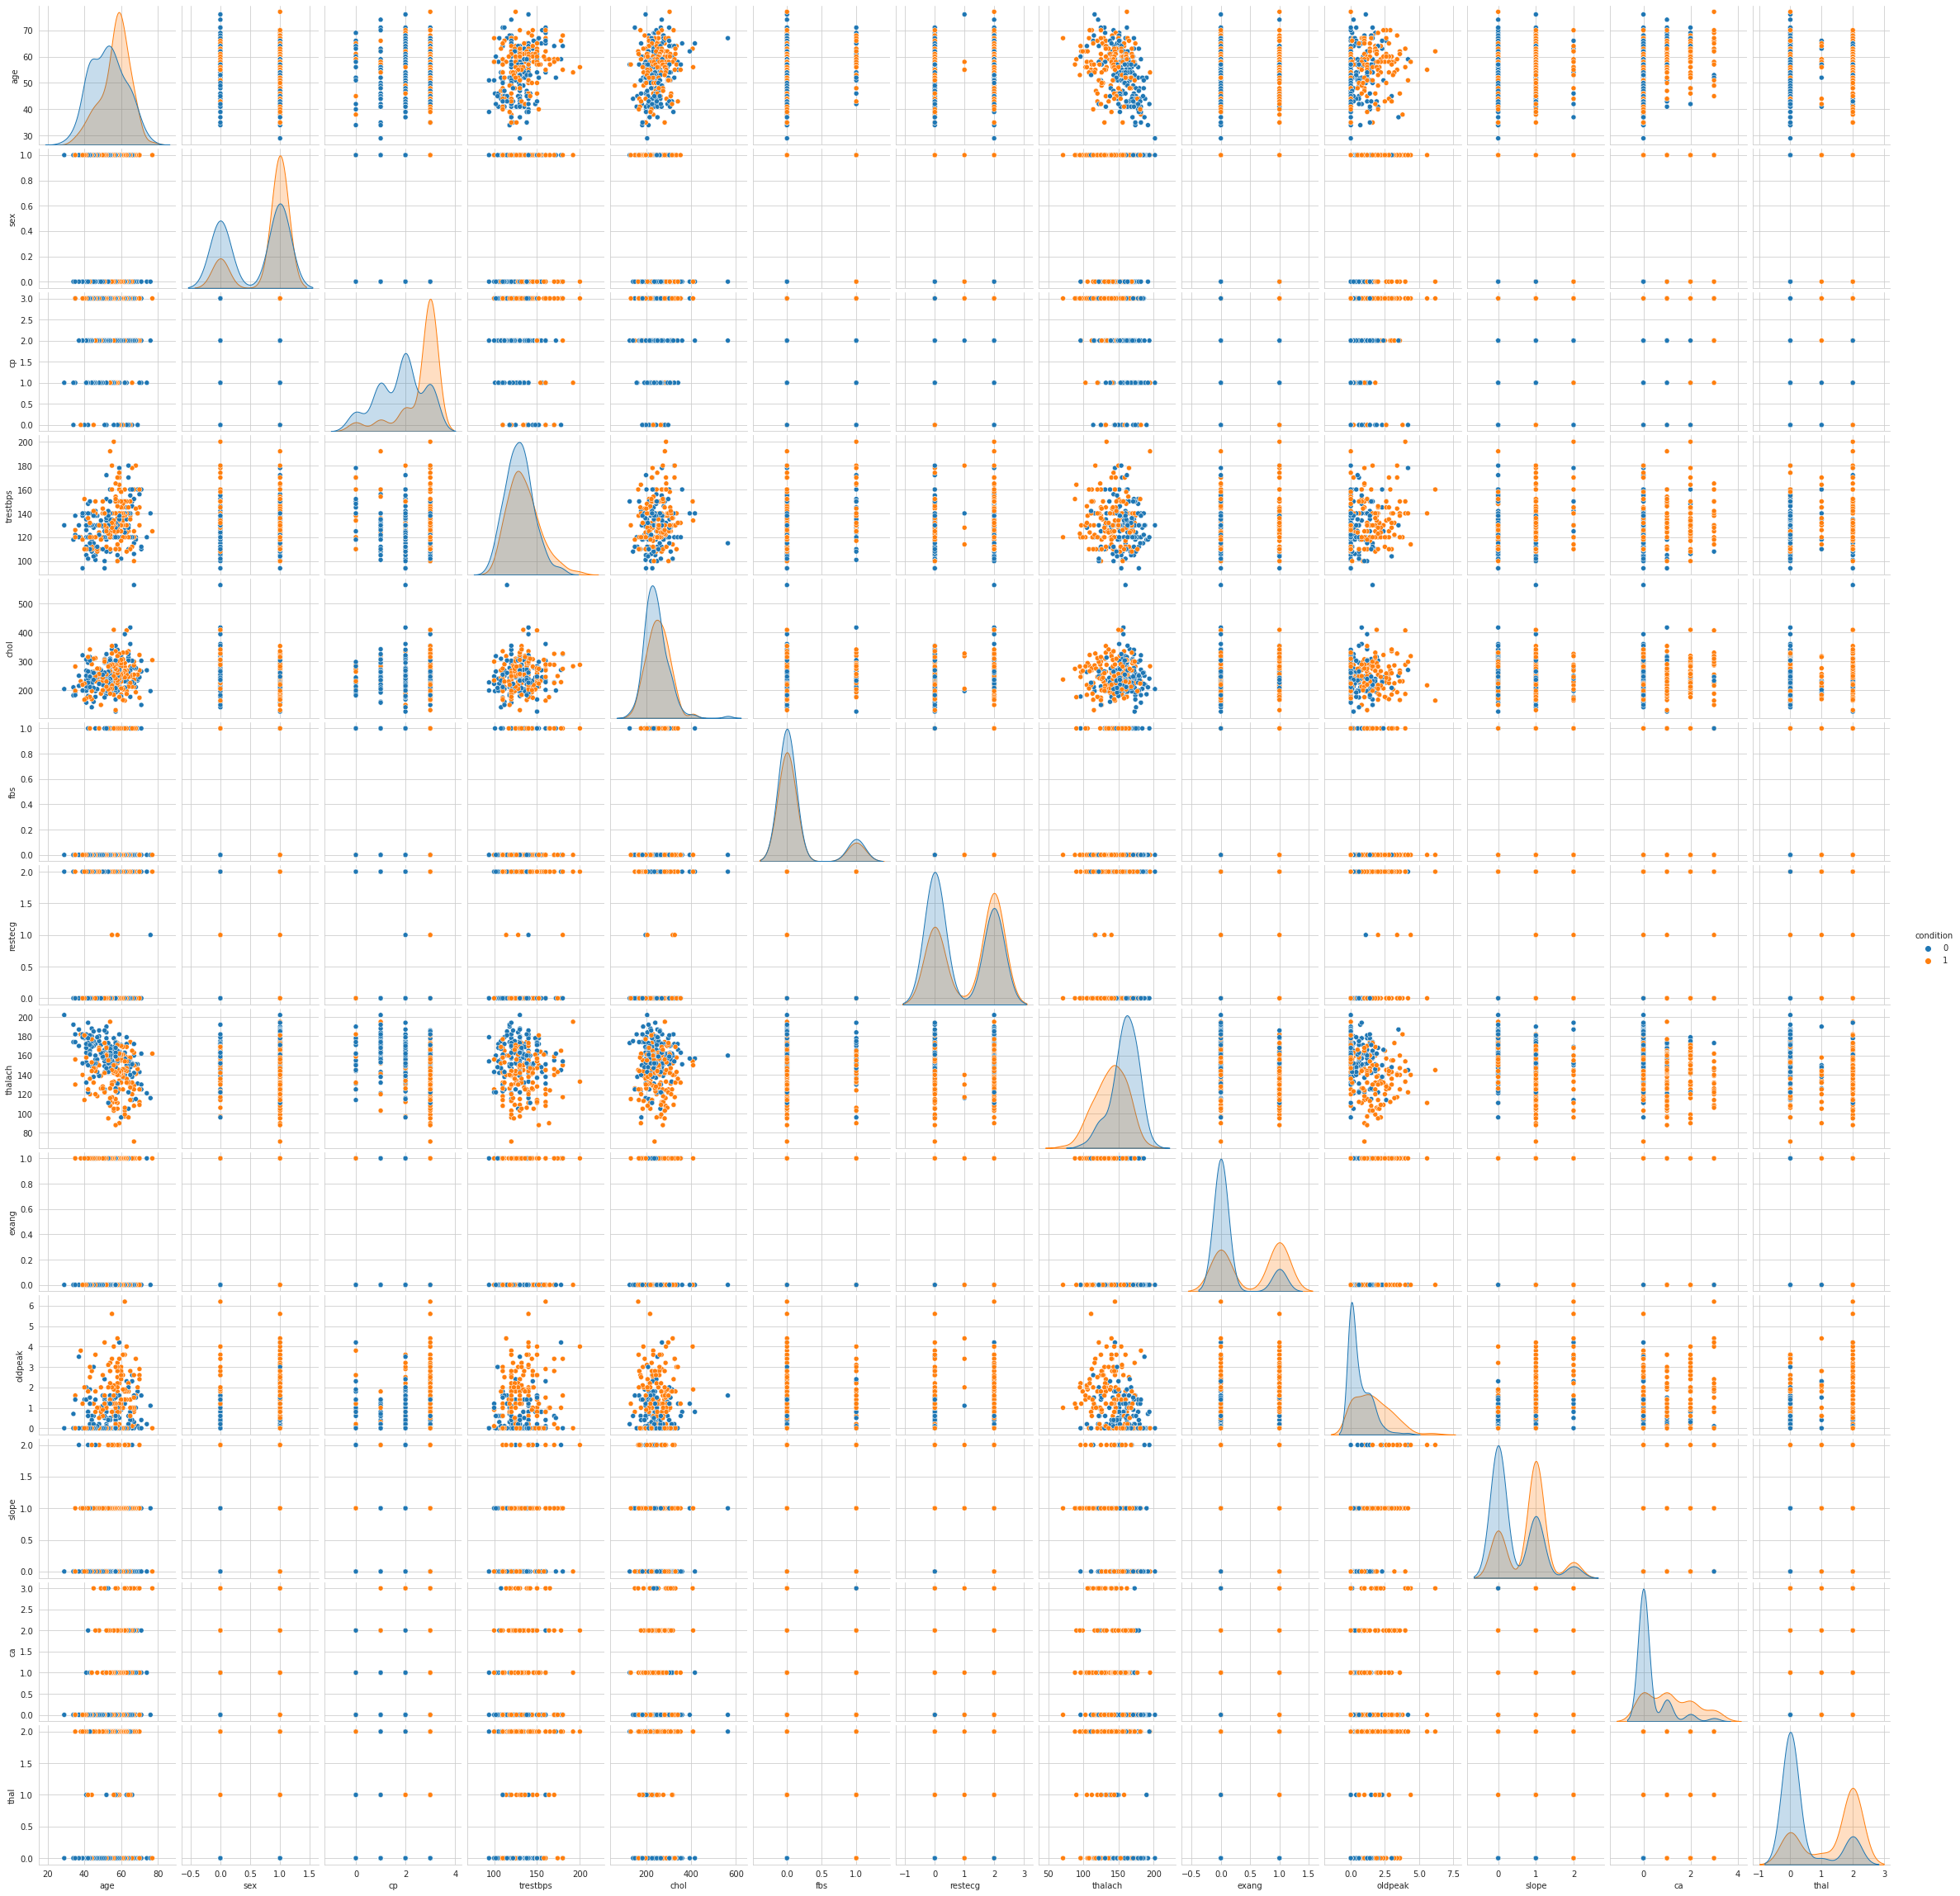

In [ ]:
sb.pairplot(data,hue="condition")
plt.show()

## **SEPERATING OUT CLASS LABELS AND VECTORS**

In [ ]:
y_data = data['condition']
x_data = data.drop(['condition'],axis=1)

In [ ]:
print(x_data.shape)
print(y_data.shape)

(297, 13)
(297,)


## **DATA VISUALIZATION USING T-SNE PLOT**

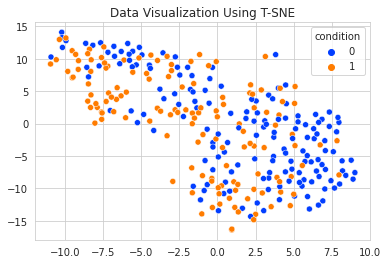

In [ ]:
label_df = pd.DataFrame(y_data)
tsne = TSNE(n_components=2,perplexity=50,n_iter=2000)
tsne_2dim = tsne.fit_transform(x_data)
palette = sb.color_palette("bright",2)
sb.scatterplot(tsne_2dim[:,0],tsne_2dim[:,1],hue=label_df['condition'],palette=palette,legend='full')
plt.title("Data Visualization Using T-SNE")
plt.show()

## **THE CORRELATION MAP**

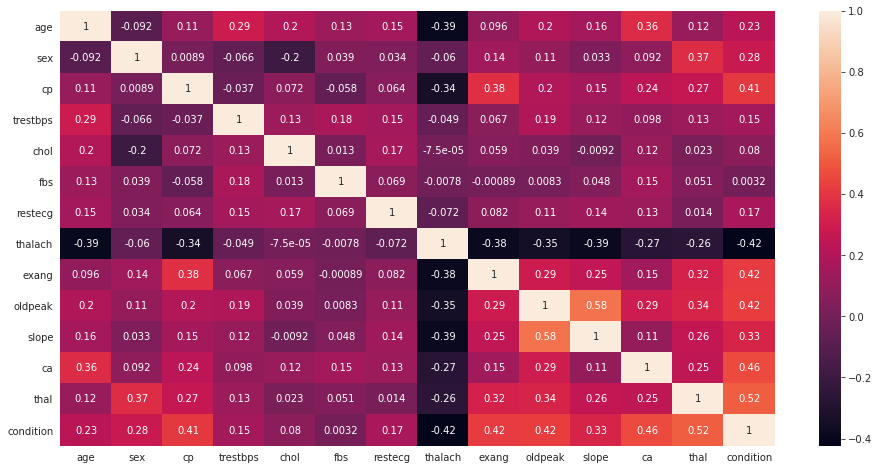

In [ ]:
Var_Corr = data.corr()
plt.figure(figsize=(16,8))
sb.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.show()

0.7 is good value for feature selection (see the last row ; feature vs condition(class label))

## **TRAIN-CV-TEST SPLIT**

In [ ]:
x_train,x_cv,y_train,y_cv = train_test_split(x_data,y_data,train_size=0.85,random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,train_size=0.83,random_state=42)
print("X Train Shape::",x_train.shape)
print("Y Train Shape::",y_train.shape)
print("X CV Shape::",x_cv.shape)
print("Y CV Shape::",y_cv.shape)
print("X Test Shape::",x_test.shape)
print("Y Test Shape::",y_test.shape)

X Train Shape:: (209, 13)
Y Train Shape:: (209,)
X CV Shape:: (45, 13)
Y CV Shape:: (45,)
X Test Shape:: (43, 13)
Y Test Shape:: (43,)


## **PERFORMING MIN-MAX STANDARDIZATION (IMPROVEMENT)**

In [ ]:
scale = MinMaxScaler()
x_train_std = scale.fit_transform(x_train)
x_cv_std = scale.transform(x_cv)
x_test_std = scale.transform(x_test)
print("X Train Shape After Standardisation::",x_train_std.shape)
print("X CV Shape After Standardisation::",x_cv_std.shape)
print("X Test Shape After Standardisation::",x_test_std.shape)

X Train Shape After Standardisation:: (209, 13)
X CV Shape After Standardisation:: (45, 13)
X Test Shape After Standardisation:: (43, 13)


## **FUNCTION DEFINITION FOR PLOTTING PERFORMANCE PLOTS ON CV DATA**

In [ ]:
def plot_graph_cv(hyp_param,perf_list,fig_title,xlab):
  plt.plot(perf_list[0],label = "accuracy")
  plt.plot(perf_list[1],label = "classification Error")
  plt.plot(perf_list[2],label = "precision")
  plt.plot(perf_list[3],label = "f-score")
  plt.plot(perf_list[4],label = "sensitivity(Recall)")
  plt.plot(perf_list[5],label = "specificity")
  plt.grid(linestyle='-')
  plt.legend()
  plt.title(fig_title)
  plt.xlabel(xlab)
  plt.ylabel("PERFORMANCE ON CV DATA")
  plt.xticks([x for x in range(len(hyp_param))],hyp_param)
  plt.show()

# **APPLYING NAIVE BAYES**

## **USING CV DATA FOR HYPER-PARAMTER TUNING**


Values of Alpha:: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
Accuracies on CV data:: [0.8, 0.8, 0.8, 0.8, 0.8, 0.7777777777777778, 0.6888888888888889, 0.5777777777777777]
Class-Error on CV data:: [0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.2222222222222222, 0.3111111111111111, 0.4222222222222223]
Precison Scores on CV data:: [0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7142857142857143, 0.7777777777777778, 0.0]
F-Scores on CV data:: [0.7804878048780488, 0.7804878048780488, 0.7804878048780488, 0.7804878048780488, 0.7804878048780488, 0.7500000000000001, 0.5, 0.0]
Recall Scores on CV data:: [0.8421052631578947, 0.8421052631578947, 0.8421052631578947, 0.8421052631578947, 0.8421052631578947, 0.7894736842105263, 0.3684210526315789, 0.0]
Specificity Scores CV data:: [0.7692307692307693, 0.7692307692307693, 0.7692307692307693, 0.7692307692307693, 0.7692307692307693, 0.769

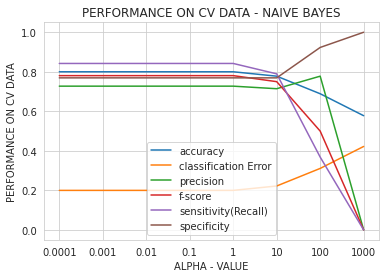

In [ ]:
alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000]
## accuracy, class_error, precision , fscore, sensitivity (recall), specificity
cv_perf_nb = [[],[],[],[],[],[]]
for a in alpha:
  nb = MultinomialNB(alpha=a)
  nb.fit(x_train_std,y_train)
  y_cv_preds_nb = nb.predict(x_cv_std)
  cv_perf_nb[0].append(accuracy_score(y_cv,y_cv_preds_nb)) ## acc
  cv_perf_nb[1].append(1-accuracy_score(y_cv,y_cv_preds_nb))
  cv_perf_nb[2].append(precision_score(y_cv,y_cv_preds_nb))
  cv_perf_nb[3].append(f1_score(y_cv,y_cv_preds_nb))
  cv_perf_nb[4].append(recall_score(y_cv,y_cv_preds_nb))
  tn, fp, fn, tp = confusion_matrix(y_cv,y_cv_preds_nb).ravel()
  specificity = tn / (tn+fp)
  cv_perf_nb[5].append(specificity)
print("Values of Alpha::",alpha)
print("Accuracies on CV data::",cv_perf_nb[0])
print("Class-Error on CV data::",cv_perf_nb[1])
print("Precison Scores on CV data::",cv_perf_nb[2])
print("F-Scores on CV data::",cv_perf_nb[3])
print("Recall Scores on CV data::",cv_perf_nb[4])
print("Specificity Scores CV data::",cv_perf_nb[5])
plot_graph_cv(alpha,cv_perf_nb,"PERFORMANCE ON CV DATA - NAIVE BAYES","ALPHA - VALUE")

#### **OPTIMAL PERFORMANCE AT ALPHA=1**

## **PERFORMANCE ON TEST DATA WITH OPTIMAL PARAMETERS - NAIVE BAYES**

In [ ]:
nb_opt = MultinomialNB(alpha=1)
nb_opt.fit(x_train_std,y_train)
y_test_preds_nb = nb_opt.predict(x_test_std)
print("Accuracy on Test Data::",accuracy_score(y_test,y_test_preds_nb)) ## acc
print("Classification Error on Test Data::",1-accuracy_score(y_test,y_test_preds_nb))
print("Precision on Test Data::",precision_score(y_test,y_test_preds_nb))
print("F1-Score on Test Data::",f1_score(y_test,y_test_preds_nb))
print("Recall(Sensitivity) on Test Data::",recall_score(y_test,y_test_preds_nb))
tn, fp, fn, tp = confusion_matrix(y_test,y_test_preds_nb).ravel()
specificity = tn / (tn+fp)
print("Specificity on Test Data::",recall_score(y_test,y_test_preds_nb))

Accuracy on Test Data:: 0.8372093023255814
Classification Error on Test Data:: 0.16279069767441856
Precision on Test Data:: 0.8421052631578947
F1-Score on Test Data:: 0.8205128205128205
Recall(Sensitivity) on Test Data:: 0.8
Specificity on Test Data:: 0.8


# **APPLYING LOGISTIC REGRESSION**

## **USING CV DATA FOR HYPERPARAMTER TUNING**

Values of C:: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
Accuracies on CV data:: [0.5777777777777777, 0.5777777777777777, 0.8, 0.7777777777777778, 0.7777777777777778, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555]
Class-Error on CV data:: [0.4222222222222223, 0.4222222222222223, 0.19999999999999996, 0.2222222222222222, 0.2222222222222222, 0.24444444444444446, 0.24444444444444446, 0.24444444444444446]
Precison Scores on CV data:: [0.0, 0.0, 0.8125, 0.6956521739130435, 0.68, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
F-Scores on CV data:: [0.0, 0.0, 0.742857142857143, 0.761904761904762, 0.7727272727272727, 0.744186046511628, 0.744186046511628, 0.744186046511628]
Recall Scores on CV data:: [0.0, 0.0, 0.6842105263157895, 0.8421052631578947, 0.8947368421052632, 0.8421052631578947, 0.8421052631578947, 0.8421052631578947]
Specificity Scores CV data:: [1.0, 1.0, 0.8846153846153846, 0.7307692307692307, 0.6923076923076923, 0.6923076923076923, 0.6923076923076923, 0

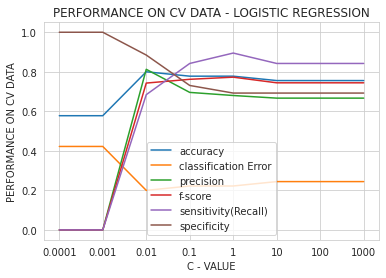

In [ ]:
c_val = [0.0001,0.001,0.01,0.1,1,10,100,1000]
## accuracy, class_error, precision , fscore, sensitivity (recall), specificity
cv_perf_lr = [[],[],[],[],[],[]]
for c in c_val:
  lr = LogisticRegression(random_state=0,C=c,penalty='l2')
  lr.fit(x_train_std,y_train)
  y_cv_preds_lr = lr.predict(x_cv_std)
  cv_perf_lr[0].append(accuracy_score(y_cv,y_cv_preds_lr)) ## acc
  cv_perf_lr[1].append(1-accuracy_score(y_cv,y_cv_preds_lr))
  cv_perf_lr[2].append(precision_score(y_cv,y_cv_preds_lr))
  cv_perf_lr[3].append(f1_score(y_cv,y_cv_preds_lr))
  cv_perf_lr[4].append(recall_score(y_cv,y_cv_preds_lr))
  tn, fp, fn, tp = confusion_matrix(y_cv,y_cv_preds_lr).ravel()
  specificity = tn / (tn+fp)
  cv_perf_lr[5].append(specificity)
print("Values of C::",c_val)
print("Accuracies on CV data::",cv_perf_lr[0])
print("Class-Error on CV data::",cv_perf_lr[1])
print("Precison Scores on CV data::",cv_perf_lr[2])
print("F-Scores on CV data::",cv_perf_lr[3])
print("Recall Scores on CV data::",cv_perf_lr[4])
print("Specificity Scores CV data::",cv_perf_lr[5])
plot_graph_cv(c_val,cv_perf_lr,"PERFORMANCE ON CV DATA - LOGISTIC REGRESSION","C - VALUE")

#### **OPTIMAL PERFORMANCE AT C=0.01**

## **PERFORMANCE ON TEST DATA WITH OPTIMAL PARAMETERS - LOGISTIC REGRESSION**

In [ ]:
lr_opt = LogisticRegression(random_state=0,C=0.01,penalty='l2')
lr_opt.fit(x_train_std,y_train)
y_test_preds_lr = lr_opt.predict(x_test_std)
print("Accuracy on Test Data::",accuracy_score(y_test,y_test_preds_lr)) ## acc
print("Classification Error on Test Data::",1-accuracy_score(y_test,y_test_preds_lr))
print("Precision on Test Data::",precision_score(y_test,y_test_preds_lr))
print("F1-Score on Test Data::",f1_score(y_test,y_test_preds_lr))
print("Recall(Sensitivity) on Test Data::",recall_score(y_test,y_test_preds_lr))
tn, fp, fn, tp = confusion_matrix(y_test,y_test_preds_lr).ravel()
specificity = tn / (tn+fp)
print("Specificity on Test Data::",recall_score(y_test,y_test_preds_lr))  

Accuracy on Test Data:: 0.8372093023255814
Classification Error on Test Data:: 0.16279069767441856
Precision on Test Data:: 0.9333333333333333
F1-Score on Test Data:: 0.8
Recall(Sensitivity) on Test Data:: 0.7
Specificity on Test Data:: 0.7


# **APPLYING DECISION TREE**

## **USING CV DATA FOR HYPERPARAMTER TUNING**

Values of C:: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Accuracies on CV data:: [0.7111111111111111, 0.6888888888888889, 0.7111111111111111, 0.8, 0.8, 0.8, 0.7555555555555555, 0.8, 0.7555555555555555, 0.8222222222222222, 0.8222222222222222, 0.8222222222222222, 0.8222222222222222, 0.8222222222222222, 0.8222222222222222]
Class-Error on CV data:: [0.28888888888888886, 0.3111111111111111, 0.28888888888888886, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.24444444444444446, 0.19999999999999996, 0.24444444444444446, 0.1777777777777778, 0.1777777777777778, 0.1777777777777778, 0.1777777777777778, 0.1777777777777778, 0.1777777777777778]
Precison Scores on CV data:: [0.625, 0.5806451612903226, 0.6363636363636364, 0.7777777777777778, 0.75, 0.7272727272727273, 0.6818181818181818, 0.7272727272727273, 0.6818181818181818, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619]
F-Scores on CV data:: [0.6976744

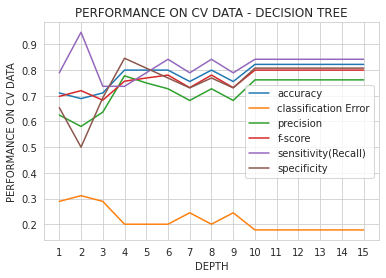

In [ ]:
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
cv_perf_dt = [[],[],[],[],[],[]]
for d in depth:
  dt = DecisionTreeClassifier(max_depth=d,random_state=0)
  dt.fit(x_train,y_train)
  y_cv_preds_dt = dt.predict(x_cv)
  cv_perf_dt[0].append(accuracy_score(y_cv,y_cv_preds_dt)) ## acc
  cv_perf_dt[1].append(1-accuracy_score(y_cv,y_cv_preds_dt))
  cv_perf_dt[2].append(precision_score(y_cv,y_cv_preds_dt))
  cv_perf_dt[3].append(f1_score(y_cv,y_cv_preds_dt))
  cv_perf_dt[4].append(recall_score(y_cv,y_cv_preds_dt))
  tn, fp, fn, tp = confusion_matrix(y_cv,y_cv_preds_dt).ravel()
  specificity = tn / (tn+fp)
  cv_perf_dt[5].append(specificity)
print("Values of C::",depth)
print("Accuracies on CV data::",cv_perf_dt[0])
print("Class-Error on CV data::",cv_perf_dt[1])
print("Precison Scores on CV data::",cv_perf_dt[2])
print("F-Scores on CV data::",cv_perf_dt[3])
print("Recall Scores on CV data::",cv_perf_dt[4])
print("Specificity Scores CV data::",cv_perf_dt[5])
plot_graph_cv(depth,cv_perf_dt,"PERFORMANCE ON CV DATA - DECISION TREE","DEPTH")

#### **OPTIMAL PERFORMANCE AT DEPTH=10**

## **PERFORMANCE ON TEST DATA WITH OPTIMAL PARAMETERS - DECISION TREE**

In [ ]:
dt_opt = DecisionTreeClassifier(max_depth=10,random_state=0)
dt_opt.fit(x_train,y_train)
y_test_preds_dt = dt_opt.predict(x_test)
print("Accuracy on Test Data::",accuracy_score(y_test,y_test_preds_dt)) ## acc
print("Classification Error on Test Data::",1-accuracy_score(y_test,y_test_preds_dt))
print("Precision on Test Data::",precision_score(y_test,y_test_preds_dt))
print("F1-Score on Test Data::",f1_score(y_test,y_test_preds_dt))
print("Recall(Sensitivity) on Test Data::",recall_score(y_test,y_test_preds_dt))
tn, fp, fn, tp = confusion_matrix(y_test,y_test_preds_dt).ravel()
specificity = tn / (tn+fp)
print("Specificity on Test Data::",recall_score(y_test,y_test_preds_dt))  

Accuracy on Test Data:: 0.8372093023255814
Classification Error on Test Data:: 0.16279069767441856
Precision on Test Data:: 0.8823529411764706
F1-Score on Test Data:: 0.8108108108108107
Recall(Sensitivity) on Test Data:: 0.75
Specificity on Test Data:: 0.75


# **APPLYING KNN (IMPROVEMENT)**

## **USING CV DATA FOR HYPERPARAMTER TUNING**

Values of C:: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Accuracies on CV data:: [0.7111111111111111, 0.7111111111111111, 0.7555555555555555, 0.7555555555555555, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7333333333333333, 0.7555555555555555, 0.7555555555555555, 0.7777777777777778, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7555555555555555, 0.7555555555555555, 0.7777777777777778, 0.7555555555555555, 0.8]
Class-Error on CV data:: [0.28888888888888886, 0.28888888888888886, 0.24444444444444446, 0.24444444444444446, 0.2666666666666667, 0.2666666666666667, 0.2666666666666667, 0.24444444444444446, 0.24444444444444446, 0.24444444444444446, 0.2666666666666667, 0.24444444444444446, 0.24444444444444446, 0.2222222222222222, 0.2666666666666667, 0.2666666666666667, 0.2666666666666667, 0.24444444444444446, 0.24444444444444446, 0.2222222222222222, 0.24444444444444446

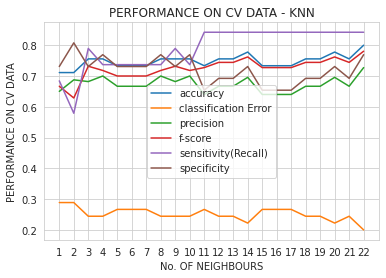

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_val = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
cv_perf_knn = [[],[],[],[],[],[]]
for k in k_val:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_std,y_train)
  y_cv_preds_knn = knn.predict(x_cv_std)
  cv_perf_knn[0].append(accuracy_score(y_cv,y_cv_preds_knn)) ## acc
  cv_perf_knn[1].append(1-accuracy_score(y_cv,y_cv_preds_knn))
  cv_perf_knn[2].append(precision_score(y_cv,y_cv_preds_knn))
  cv_perf_knn[3].append(f1_score(y_cv,y_cv_preds_knn))
  cv_perf_knn[4].append(recall_score(y_cv,y_cv_preds_knn))
  tn, fp, fn, tp = confusion_matrix(y_cv,y_cv_preds_knn).ravel()
  specificity = tn / (tn+fp)
  cv_perf_knn[5].append(specificity)
print("Values of C::",k_val)
print("Accuracies on CV data::",cv_perf_knn[0])
print("Class-Error on CV data::",cv_perf_knn[1])
print("Precison Scores on CV data::",cv_perf_knn[2])
print("F-Scores on CV data::",cv_perf_knn[3])
print("Recall Scores on CV data::",cv_perf_knn[4])
print("Specificity Scores CV data::",cv_perf_knn[5])
plot_graph_cv(k_val,cv_perf_knn,"PERFORMANCE ON CV DATA - KNN","No. OF NEIGHBOURS")

#### **OPTIMAL PERFORMANCE IS AT K= 22**

## **PERFORMANCE ON TEST DATA WITH OPTIMAL PARAMTERS - KNN**

In [ ]:
knn_opt = KNeighborsClassifier(n_neighbors=22)
knn_opt.fit(x_train_std,y_train)
y_test_preds_knn = knn_opt.predict(x_test_std)
print("Accuracy on Test Data::",accuracy_score(y_test,y_test_preds_knn)) ## acc
print("Classification Error on Test Data::",1-accuracy_score(y_test,y_test_preds_knn))
print("Precision on Test Data::",precision_score(y_test,y_test_preds_knn))
print("F1-Score on Test Data::",f1_score(y_test,y_test_preds_knn))
print("Recall(Sensitivity) on Test Data::",recall_score(y_test,y_test_preds_knn))
tn, fp, fn, tp = confusion_matrix(y_test,y_test_preds_knn).ravel()
specificity = tn / (tn+fp)
print("Specificity on Test Data::",recall_score(y_test,y_test_preds_knn))  

Accuracy on Test Data:: 0.8372093023255814
Classification Error on Test Data:: 0.16279069767441856
Precision on Test Data:: 0.8823529411764706
F1-Score on Test Data:: 0.8108108108108107
Recall(Sensitivity) on Test Data:: 0.75
Specificity on Test Data:: 0.75


# **APPLYING LINEAR SVM**

## **USING CV DATA FOR HYPERPARAMTER TUNING**

Values of C:: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
Accuracies on CV data:: [0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555]
Class-Error on CV data:: [0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.24444444444444446, 0.24444444444444446, 0.24444444444444446, 0.24444444444444446]
Precison Scores on CV data:: [0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
F-Scores on CV data:: [0.761904761904762, 0.761904761904762, 0.761904761904762, 0.761904761904762, 0.761904761904762, 0.761904761904762, 0.744186046511628, 0.744186046511628, 0.744186046511628, 0.744186046511628]
Recall Scores on CV data:: [0.842105263

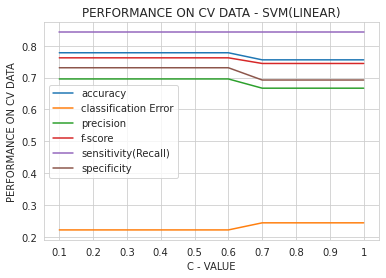

In [ ]:
c_vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
cv_perf_svmlin = [[],[],[],[],[],[]]
for c in c_vals:
  svmlin = SVC(C=c,kernel='linear',probability=True,random_state=0)
  svmlin.fit(x_train_std,y_train)
  y_cv_preds_svmlin = svmlin.predict(x_cv_std)
  cv_perf_svmlin[0].append(accuracy_score(y_cv,y_cv_preds_svmlin)) ## acc
  cv_perf_svmlin[1].append(1-accuracy_score(y_cv,y_cv_preds_svmlin))
  cv_perf_svmlin[2].append(precision_score(y_cv,y_cv_preds_svmlin))
  cv_perf_svmlin[3].append(f1_score(y_cv,y_cv_preds_svmlin))
  cv_perf_svmlin[4].append(recall_score(y_cv,y_cv_preds_svmlin))
  tn, fp, fn, tp = confusion_matrix(y_cv,y_cv_preds_svmlin).ravel()
  specificity = tn / (tn+fp)
  cv_perf_svmlin[5].append(specificity)
print("Values of C::",c_vals)
print("Accuracies on CV data::",cv_perf_svmlin[0])
print("Class-Error on CV data::",cv_perf_svmlin[1])
print("Precison Scores on CV data::",cv_perf_svmlin[2])
print("F-Scores on CV data::",cv_perf_svmlin[3])
print("Recall Scores on CV data::",cv_perf_svmlin[4])
print("Specificity Scores CV data::",cv_perf_svmlin[5])
plot_graph_cv(c_vals,cv_perf_svmlin,"PERFORMANCE ON CV DATA - SVM(LINEAR)","C - VALUE")

#### **OPTIMAL PERFORMANCE AT C=0.1**

## **PERFORMANCE ON TEST DATA WITH OPTIMAL PARAMTERS - LINEAR SVM**

In [ ]:
svmlin_opt = SVC(C=10,kernel='linear',probability=True,random_state=0)
svmlin_opt.fit(x_train_std,y_train)
y_test_preds_svmlin = svmlin_opt.predict(x_test_std)
print("Accuracy on Test Data::",accuracy_score(y_test,y_test_preds_svmlin)) ## acc
print("Classification Error on Test Data::",1-accuracy_score(y_test,y_test_preds_svmlin))
print("Precision on Test Data::",precision_score(y_test,y_test_preds_svmlin))
print("F1-Score on Test Data::",f1_score(y_test,y_test_preds_svmlin))
print("Recall(Sensitivity) on Test Data::",recall_score(y_test,y_test_preds_svmlin))
tn, fp, fn, tp = confusion_matrix(y_test,y_test_preds_svmlin).ravel()
specificity = tn / (tn+fp)
print("Specificity on Test Data::",recall_score(y_test,y_test_preds_svmlin))  

Accuracy on Test Data:: 0.9069767441860465
Classification Error on Test Data:: 0.09302325581395354
Precision on Test Data:: 0.9444444444444444
F1-Score on Test Data:: 0.8947368421052632
Recall(Sensitivity) on Test Data:: 0.85
Specificity on Test Data:: 0.85


# **APPLYING GBDT**

## **USING CV DATA FOR HYPERPARAMTER TUNING**

Values of DEPTH:: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Accuracies on CV data:: [0.8444444444444444, 0.8, 0.8, 0.7777777777777778, 0.6888888888888889, 0.7777777777777778, 0.7333333333333333, 0.7777777777777778, 0.8222222222222222, 0.8222222222222222]
Class-Error on CV data:: [0.15555555555555556, 0.19999999999999996, 0.19999999999999996, 0.2222222222222222, 0.3111111111111111, 0.2222222222222222, 0.2666666666666667, 0.2222222222222222, 0.1777777777777778, 0.1777777777777778]
Precison Scores on CV data:: [0.7727272727272727, 0.7272727272727273, 0.7272727272727273, 0.7142857142857143, 0.6190476190476191, 0.7142857142857143, 0.6521739130434783, 0.6956521739130435, 0.7619047619047619, 0.7619047619047619]
F-Scores on CV data:: [0.8292682926829269, 0.7804878048780488, 0.7804878048780488, 0.7500000000000001, 0.6500000000000001, 0.7500000000000001, 0.7142857142857143, 0.761904761904762, 0.8, 0.8]
Recall Scores on CV data:: [0.8947368421052632, 0.8421052631578947, 0.8421052631578947, 0.78947368421052

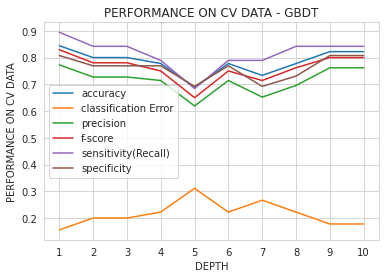

In [ ]:
depth = [1,2,3,4,5,6,7,8,9,10]
cv_perf_gbdt = [[],[],[],[],[],[]]
for d in depth:
  gbdt = GradientBoostingClassifier(n_estimators=100,max_depth=d,random_state=0)
  gbdt.fit(x_train,y_train)
  y_cv_preds_gbdt = gbdt.predict(x_cv)
  cv_perf_gbdt[0].append(accuracy_score(y_cv,y_cv_preds_gbdt)) ## acc
  cv_perf_gbdt[1].append(1-accuracy_score(y_cv,y_cv_preds_gbdt))
  cv_perf_gbdt[2].append(precision_score(y_cv,y_cv_preds_gbdt))
  cv_perf_gbdt[3].append(f1_score(y_cv,y_cv_preds_gbdt))
  cv_perf_gbdt[4].append(recall_score(y_cv,y_cv_preds_gbdt))
  tn, fp, fn, tp = confusion_matrix(y_cv,y_cv_preds_gbdt).ravel()
  specificity = tn / (tn+fp)
  cv_perf_gbdt[5].append(specificity)
print("Values of DEPTH::",depth)
print("Accuracies on CV data::",cv_perf_gbdt[0])
print("Class-Error on CV data::",cv_perf_gbdt[1])
print("Precison Scores on CV data::",cv_perf_gbdt[2])
print("F-Scores on CV data::",cv_perf_gbdt[3])
print("Recall Scores on CV data::",cv_perf_gbdt[4])
print("Specificity Scores CV data::",cv_perf_gbdt[5])
plot_graph_cv(depth,cv_perf_gbdt,"PERFORMANCE ON CV DATA - GBDT","DEPTH")

#### **OPTIMAL PERFORMANCE AT DEPTH=1**

## **PERFORMANCE ON TEST DATA WITH OPTIMAL PARAMTERS - GBDT**

In [ ]:
gbdt_opt = GradientBoostingClassifier(n_estimators=100,max_depth=1,random_state=0)
gbdt_opt.fit(x_train,y_train)
y_test_preds_gbdt = gbdt_opt.predict(x_test)
print("Accuracy on Test Data::",accuracy_score(y_test,y_test_preds_gbdt)) ## acc
print("Classification Error on Test Data::",1-accuracy_score(y_test,y_test_preds_gbdt))
print("Precision on Test Data::",precision_score(y_test,y_test_preds_gbdt))
print("F1-Score on Test Data::",f1_score(y_test,y_test_preds_gbdt))
print("Recall(Sensitivity) on Test Data::",recall_score(y_test,y_test_preds_gbdt))
tn, fp, fn, tp = confusion_matrix(y_test,y_test_preds_gbdt).ravel()
specificity = tn / (tn+fp)
print("Specificity on Test Data::",recall_score(y_test,y_test_preds_gbdt))  

Accuracy on Test Data:: 0.8604651162790697
Classification Error on Test Data:: 0.13953488372093026
Precision on Test Data:: 0.8888888888888888
F1-Score on Test Data:: 0.8421052631578948
Recall(Sensitivity) on Test Data:: 0.8
Specificity on Test Data:: 0.8


# **APPLYING MLP**

## **USING CV DATA FOR HYPERPARAMTER TUNING**

In [ ]:
model_mlp = Sequential()
model_mlp.add(Dense(8, activation='relu',input_shape=(13,),kernel_initializer='he_normal'))
model_mlp.add(BatchNormalization())
model_mlp.add(Dense(2, activation='softmax'))
model_mlp.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
values_mlp=model_mlp.fit(x_train_std, keras.utils.to_categorical(y_train, num_classes=2),batch_size=100,epochs=20,validation_data=(x_cv_std,keras.utils.to_categorical(y_cv, num_classes=2)))

Epoch 1/20
3/3 [==============================] - 1s 104ms/step - loss: 0.8722 - accuracy: 0.5183 - val_loss: 0.9325 - val_accuracy: 0.4222
Epoch 2/20
3/3 [==============================] - 0s 20ms/step - loss: 0.4164 - accuracy: 0.8498 - val_loss: 2.4110 - val_accuracy: 0.4222
Epoch 3/20
3/3 [==============================] - 0s 20ms/step - loss: 0.3627 - accuracy: 0.8536 - val_loss: 3.6118 - val_accuracy: 0.4222
Epoch 4/20
3/3 [==============================] - 0s 20ms/step - loss: 0.3895 - accuracy: 0.8522 - val_loss: 3.8797 - val_accuracy: 0.4222
Epoch 5/20
3/3 [==============================] - 0s 20ms/step - loss: 0.3453 - accuracy: 0.8646 - val_loss: 4.0362 - val_accuracy: 0.4222
Epoch 6/20
3/3 [==============================] - 0s 21ms/step - loss: 0.3373 - accuracy: 0.8499 - val_loss: 3.8662 - val_accuracy: 0.4222
Epoch 7/20
3/3 [==============================] - 0s 22ms/step - loss: 0.3396 - accuracy: 0.8328 - val_loss: 3.4006 - val_accuracy: 0.4222
Epoch 8/20
3/3 [==========

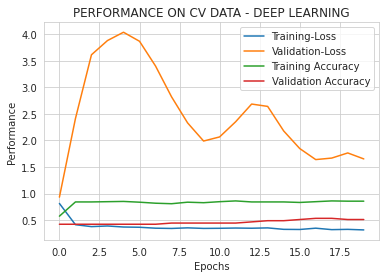

In [ ]:
plt.plot(values_mlp.history['loss'],label="Training-Loss")
plt.plot(values_mlp.history['val_loss'],label="Validation-Loss")
plt.plot(values_mlp.history['accuracy'],label="Training Accuracy")
plt.plot(values_mlp.history['val_accuracy'],label="Validation Accuracy")
plt.legend(loc='best')
plt.xlabel("Epochs")
plt.ylabel("Performance")
plt.title("PERFORMANCE ON CV DATA - DEEP LEARNING")
plt.show()

## **PERFORMANCE ON TEST DATA WITH OPTIMAL PARAMTERS - MLP**

In [ ]:
y_test_preds_mlp = model_mlp.predict_classes(x_test_std)
print("Accuracy on Test Data::",accuracy_score(y_test,y_test_preds_mlp)) ## acc
print("Classification Error on Test Data::",1-accuracy_score(y_test,y_test_preds_mlp))
print("Precision on Test Data::",precision_score(y_test,y_test_preds_mlp))
print("F1-Score on Test Data::",f1_score(y_test,y_test_preds_mlp))
print("Recall(Sensitivity) on Test Data::",recall_score(y_test,y_test_preds_mlp))
tn, fp, fn, tp = confusion_matrix(y_test,y_test_preds_mlp).ravel()
specificity = tn / (tn+fp)
print("Specificity on Test Data::",recall_score(y_test,y_test_preds_mlp))  

Accuracy on Test Data:: 0.6046511627906976
Classification Error on Test Data:: 0.39534883720930236
Precision on Test Data:: 0.5405405405405406
F1-Score on Test Data:: 0.7017543859649124
Recall(Sensitivity) on Test Data:: 1.0
Specificity on Test Data:: 1.0


In [ ]:
'''model_mlp.save('/content/drive/MyDrive/MLBA_PROJECT/mlp_project.h5')'''

# **APPLYING RANDOM FOREST**

## **USING CV DATA FOR HYPERPARAMTER TUNING**

Values of C:: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Accuracies on CV data:: [0.8, 0.7555555555555555, 0.7555555555555555, 0.7777777777777778, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555]
Class-Error on CV data:: [0.19999999999999996, 0.24444444444444446, 0.24444444444444446, 0.2222222222222222, 0.24444444444444446, 0.24444444444444446, 0.24444444444444446, 0.24444444444444446, 0.24444444444444446, 0.24444444444444446, 0.24444444444444446]
Precison Scores on CV data:: [0.7777777777777778, 0.7, 0.7, 0.7368421052631579, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
F-Scores on CV data:: [0.7567567567567567, 0.717948717948718, 0.717948717948718, 0.7368421052631579, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718]
Recall Scores on CV data:: [0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7

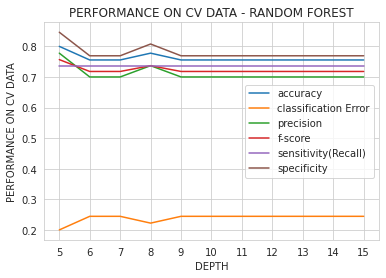

In [ ]:
depth = [5,6,7,8,9,10,11,12,13,14,15]
cv_perf_rf = [[],[],[],[],[],[]]
for d in depth:
  rf = RandomForestClassifier(n_estimators=100,max_depth=d,random_state=0)
  rf.fit(x_train,y_train)
  y_cv_preds_rf = rf.predict(x_cv)
  cv_perf_rf[0].append(accuracy_score(y_cv,y_cv_preds_rf)) ## acc
  cv_perf_rf[1].append(1-accuracy_score(y_cv,y_cv_preds_rf))
  cv_perf_rf[2].append(precision_score(y_cv,y_cv_preds_rf))
  cv_perf_rf[3].append(f1_score(y_cv,y_cv_preds_rf))
  cv_perf_rf[4].append(recall_score(y_cv,y_cv_preds_rf))
  tn, fp, fn, tp = confusion_matrix(y_cv,y_cv_preds_rf).ravel()
  specificity = tn / (tn+fp)
  cv_perf_rf[5].append(specificity)
print("Values of C::",depth)
print("Accuracies on CV data::",cv_perf_rf[0])
print("Class-Error on CV data::",cv_perf_rf[1])
print("Precison Scores on CV data::",cv_perf_rf[2])
print("F-Scores on CV data::",cv_perf_rf[3])
print("Recall Scores on CV data::",cv_perf_rf[4])
print("Specificity Scores CV data::",cv_perf_rf[5])
plot_graph_cv(depth,cv_perf_rf,"PERFORMANCE ON CV DATA - RANDOM FOREST","DEPTH")

#### **OPTIMAL PERFORMANCE AT DEPTH=5**

## **PERFORMANCE ON TEST DATA WITH OPTIMAL PARAMTERS - RANDOM FOREST**

In [ ]:
rf_opt = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=0)
rf_opt.fit(x_train,y_train)
y_test_preds_rf = rf_opt.predict(x_test)
print("Accuracy on Test Data::",accuracy_score(y_test,y_test_preds_rf)) ## acc
print("Classification Error on Test Data::",1-accuracy_score(y_test,y_test_preds_rf))
print("Precision on Test Data::",precision_score(y_test,y_test_preds_rf))
print("F1-Score on Test Data::",f1_score(y_test,y_test_preds_rf))
print("Recall(Sensitivity) on Test Data::",recall_score(y_test,y_test_preds_rf))
tn, fp, fn, tp = confusion_matrix(y_test,y_test_preds_rf).ravel()
specificity = tn / (tn+fp)
print("Specificity on Test Data::",recall_score(y_test,y_test_preds_rf))  

Accuracy on Test Data:: 0.8604651162790697
Classification Error on Test Data:: 0.13953488372093026
Precision on Test Data:: 0.8888888888888888
F1-Score on Test Data:: 0.8421052631578948
Recall(Sensitivity) on Test Data:: 0.8
Specificity on Test Data:: 0.8


# **APPLYING ADABOOST CLASSIFIER (IMPROVEMENT)**

Number of Estimators:: [100, 150, 200, 250, 300, 350, 400, 450, 500]
Accuracies on CV data:: [0.8, 0.7777777777777778, 0.7777777777777778, 0.8, 0.7555555555555555, 0.8, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778]
Class-Error on CV data:: [0.19999999999999996, 0.2222222222222222, 0.2222222222222222, 0.19999999999999996, 0.24444444444444446, 0.19999999999999996, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222]
Precison Scores on CV data:: [0.75, 0.7142857142857143, 0.7368421052631579, 0.75, 0.6818181818181818, 0.75, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143]
F-Scores on CV data:: [0.7692307692307692, 0.7500000000000001, 0.7368421052631579, 0.7692307692307692, 0.7317073170731707, 0.7692307692307692, 0.7500000000000001, 0.7500000000000001, 0.7500000000000001]
Recall Scores on CV data:: [0.7894736842105263, 0.7894736842105263, 0.7368421052631579, 0.7894736842105263, 0.7894736842105263, 0.7894736842105263, 0.7894736842105263, 0.7894736842105263, 0.

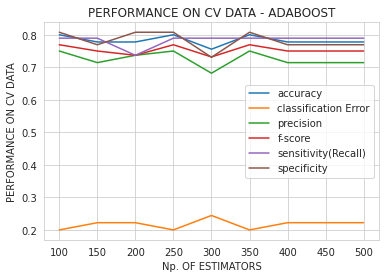

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
est = [100,150,200,250,300,350,400,450,500]
cv_perf_ad = [[],[],[],[],[],[]]
for n in est:
  adb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,random_state=0),n_estimators=n,random_state=0)
  adb.fit(x_train,y_train)
  y_cv_preds_adb = adb.predict(x_cv)
  cv_perf_ad[0].append(accuracy_score(y_cv,y_cv_preds_adb)) ## acc
  cv_perf_ad[1].append(1-accuracy_score(y_cv,y_cv_preds_adb))
  cv_perf_ad[2].append(precision_score(y_cv,y_cv_preds_adb))
  cv_perf_ad[3].append(f1_score(y_cv,y_cv_preds_adb))
  cv_perf_ad[4].append(recall_score(y_cv,y_cv_preds_adb))
  tn, fp, fn, tp = confusion_matrix(y_cv,y_cv_preds_adb).ravel()
  specificity = tn / (tn+fp)
  cv_perf_ad[5].append(specificity)
print("Number of Estimators::",est)
print("Accuracies on CV data::",cv_perf_ad[0])
print("Class-Error on CV data::",cv_perf_ad[1])
print("Precison Scores on CV data::",cv_perf_ad[2])
print("F-Scores on CV data::",cv_perf_ad[3])
print("Recall Scores on CV data::",cv_perf_ad[4])
print("Specificity Scores CV data::",cv_perf_ad[5])
plot_graph_cv(est,cv_perf_ad,"PERFORMANCE ON CV DATA - ADABOOST","Np. OF ESTIMATORS")

#### **OPTIMAL PERFORMANCE AT DEPTH=2,ESTIMATORS=100**

## **PERFORMANCE ON TEST DATA - ADABOOST**

In [ ]:
adb_opt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,random_state=0),n_estimators=100,random_state=0)
adb_opt.fit(x_train,y_train)
y_test_preds_adb = adb_opt.predict(x_test)
print("Accuracy on Test Data::",accuracy_score(y_test,y_test_preds_adb)) ## acc
print("Classification Error on Test Data::",1-accuracy_score(y_test,y_test_preds_adb))
print("Precision on Test Data::",precision_score(y_test,y_test_preds_adb))
print("F1-Score on Test Data::",f1_score(y_test,y_test_preds_adb))
print("Recall(Sensitivity) on Test Data::",recall_score(y_test,y_test_preds_adb))
tn, fp, fn, tp = confusion_matrix(y_test,y_test_preds_adb).ravel()
specificity = tn / (tn+fp)
print("Specificity on Test Data::",recall_score(y_test,y_test_preds_adb))  

Accuracy on Test Data:: 0.7209302325581395
Classification Error on Test Data:: 0.2790697674418605
Precision on Test Data:: 0.7222222222222222
F1-Score on Test Data:: 0.6842105263157895
Recall(Sensitivity) on Test Data:: 0.65
Specificity on Test Data:: 0.65


## **VOTING CLASSIFIER**

In [ ]:
voting_preds=[]
for i in range(len(y_test)):
  maj = mode([y_test_preds_nb[i],y_test_preds_lr[i],y_test_preds_dt[i],y_test_preds_knn[i],y_test_preds_svmlin[i],y_test_preds_gbdt[i],y_test_preds_mlp[i],y_test_preds_rf[i],y_test_preds_adb[i]])
  voting_preds.append(maj)

## **PERFORMANCE USING VOTING CLASSIFIER**

In [ ]:
print("Accuracy on Test Data::",accuracy_score(y_test,voting_preds)) ## acc
print("Classification Error on Test Data::",1-accuracy_score(y_test,voting_preds))
print("Precision on Test Data::",precision_score(y_test,voting_preds))
print("F1-Score on Test Data::",f1_score(y_test,voting_preds))
print("Recall(Sensitivity) on Test Data::",recall_score(y_test,voting_preds))
tn, fp, fn, tp = confusion_matrix(y_test,voting_preds).ravel()
specificity = tn / (tn+fp)
print("Specificity on Test Data::",recall_score(y_test,voting_preds)) 

Accuracy on Test Data:: 0.8837209302325582
Classification Error on Test Data:: 0.11627906976744184
Precision on Test Data:: 0.9411764705882353
F1-Score on Test Data:: 0.8648648648648648
Recall(Sensitivity) on Test Data:: 0.8
Specificity on Test Data:: 0.8


## **SAVING OPTIMAL MODEL**

In [ ]:
'''import pickle
filename = "/content/drive/MyDrive/MLBA_PROJECT/svmlin_opt.pkl"
pickle.dump(svmlin_opt, open(filename, 'wb'))
filename2 = "/content/drive/MyDrive/MLBA_PROJECT/x_train_befstd.pkl"
pickle.dump(x_train, open(filename2, 'wb'))'''